In [6]:
!pip install -q pycaret

In [3]:
import pycaret
from pycaret.datasets import get_data

In [4]:
dataset = get_data('satellite')
target = 'Class'

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [5]:
from pycaret.classification import *
class_exp = ClassificationExperiment()
class_exp.setup(dataset, target=target)

,Description,Value
0,Session id,5605
1,Target,Class
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5"
4,Original data shape,"(6435, 37)"
5,Transformed data shape,"(6435, 37)"
6,Transformed train set shape,"(4504, 37)"
7,Transformed test set shape,"(1931, 37)"
8,Numeric features,36
9,Preprocess,True


In [7]:
model = class_exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9176,0.9910,0.9176,0.9166,0.9158,0.8981,0.8985,4.1390
xgboost,Extreme Gradient Boosting,0.9163,0.9908,0.9163,0.9150,0.9142,0.8964,0.8969,1.0580
et,Extra Trees Classifier,0.9130,0.9911,0.9130,0.9123,0.9101,0.8921,0.8929,0.5340
rf,Random Forest Classifier,0.9121,0.9903,0.9121,0.9116,0.9089,0.8910,0.8919,0.9480
gbc,Gradient Boosting Classifier,0.9027,0.0000,0.9027,0.9013,0.9007,0.8797,0.8801,10.8790
knn,K Neighbors Classifier,0.8983,0.9805,0.8983,0.8984,0.8975,0.8743,0.8747,0.1020
qda,Quadratic Discriminant Analysis,0.8506,0.0000,0.8506,0.8377,0.8311,0.8140,0.8173,0.0980
dt,Decision Tree Classifier,0.8437,0.9057,0.8437,0.8469,0.8448,0.8072,0.8074,0.1050
lda,Linear Discriminant Analysis,0.8408,0.0000,0.8408,0.8361,0.8336,0.8019,0.8038,0.1010
lr,Logistic Regression,0.8055,0.0000,0.8055,0.7917,0.7883,0.7575,0.7610,2.1140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

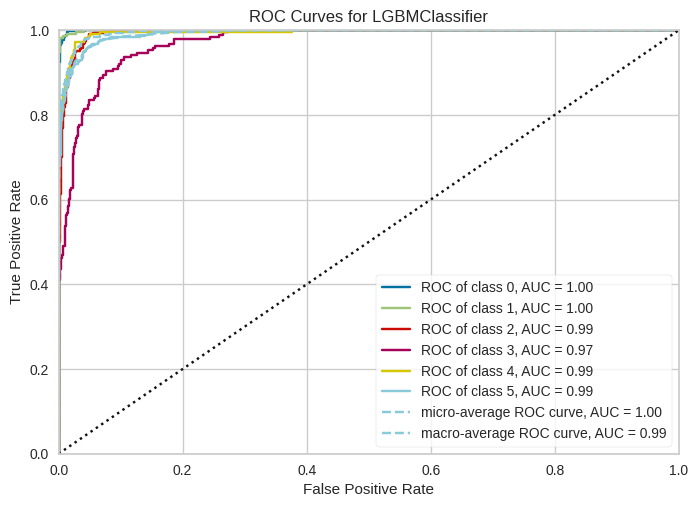

In [8]:
class_exp.plot_model(model)

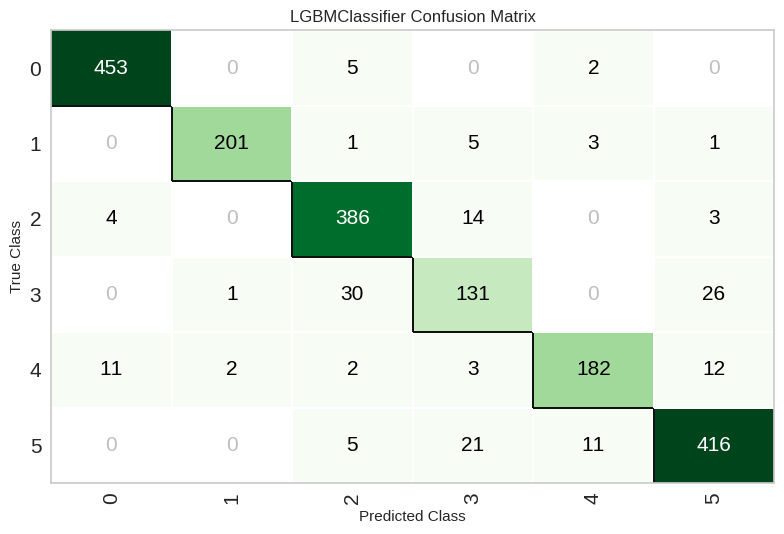

In [9]:
class_exp.plot_model(model, plot='confusion_matrix')

In [10]:
class_exp.evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
prediction = class_exp.predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9161,0.9933,0.9161,0.9152,0.9152,0.8962,0.8964


In [12]:
prediction.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36,Class,prediction_label,prediction_score
4240,71,83,93,71,71,79,93,71,71,79,...,81,86,64,63,66,62,57,7,7,0.9672
3113,76,85,90,72,76,85,90,72,76,85,...,95,100,79,79,95,96,79,4,4,0.8386
2242,66,71,80,66,66,63,76,66,59,60,...,79,85,69,67,79,82,65,7,7,0.9992
6025,76,95,104,88,68,99,113,88,60,91,...,96,100,92,56,91,108,89,1,1,1.0000
795,71,77,79,64,75,81,86,72,71,81,...,73,74,65,72,81,86,72,4,7,0.8905


In [13]:
class_exp.save_model(model, 'Satellite pipeline')
pipeline = class_exp.load_model('Satellite pipeline')
pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Attribute1', 'Attribute2',
                                             'Attribute3', 'Attribute4',
                                             'Attribute5', 'Attribute6',
                                             'Attribute7', 'Attribute8',
                                             'Attribute9', 'Attribute10...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=5605, reg_alpha=0.0,
                                reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)